In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
df = pd.read_csv("IMDB.csv")

In [19]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment'])

In [20]:
X = df['review'].values
y = df['label'].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
vocab_size = 10000
embedding_dim = 64
max_length = 200
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [23]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [24]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(X_train_pad, y_train, epochs=10, validation_data=(X_test_pad, y_test), verbose=2)

Epoch 1/10
1250/1250 - 14s - 11ms/step - accuracy: 0.8035 - loss: 0.4087 - val_accuracy: 0.8737 - val_loss: 0.2981
Epoch 2/10
1250/1250 - 12s - 9ms/step - accuracy: 0.8869 - loss: 0.2742 - val_accuracy: 0.8783 - val_loss: 0.2849
Epoch 3/10
1250/1250 - 12s - 9ms/step - accuracy: 0.9037 - loss: 0.2404 - val_accuracy: 0.8774 - val_loss: 0.2960
Epoch 4/10
1250/1250 - 11s - 9ms/step - accuracy: 0.9149 - loss: 0.2177 - val_accuracy: 0.8703 - val_loss: 0.3202
Epoch 5/10
1250/1250 - 11s - 9ms/step - accuracy: 0.9214 - loss: 0.2021 - val_accuracy: 0.8684 - val_loss: 0.3278
Epoch 6/10
1250/1250 - 12s - 9ms/step - accuracy: 0.9285 - loss: 0.1823 - val_accuracy: 0.8665 - val_loss: 0.3600
Epoch 7/10
1250/1250 - 11s - 9ms/step - accuracy: 0.9393 - loss: 0.1562 - val_accuracy: 0.8613 - val_loss: 0.3966
Epoch 8/10
1250/1250 - 12s - 9ms/step - accuracy: 0.9485 - loss: 0.1321 - val_accuracy: 0.8687 - val_loss: 0.4732
Epoch 9/10
1250/1250 - 11s - 9ms/step - accuracy: 0.9554 - loss: 0.1105 - val_accuracy:

In [28]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8433 - loss: 0.6214
Test Accuracy: 0.8459


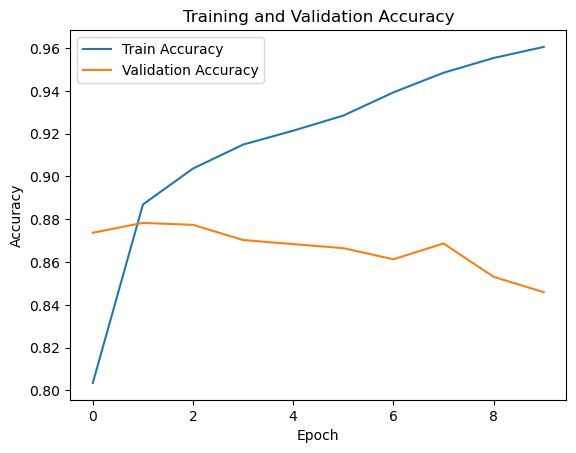

In [29]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

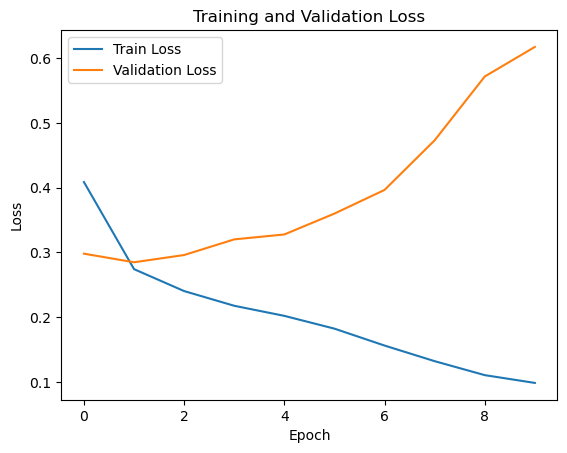

In [30]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [31]:
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


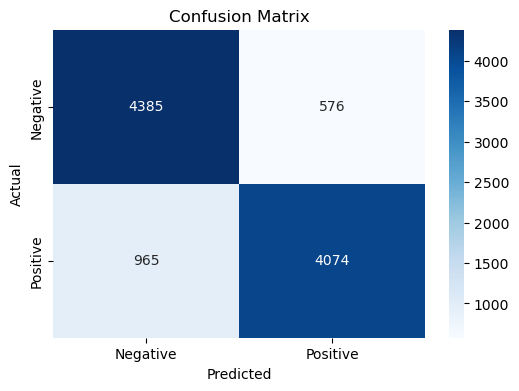

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()